In [2]:
import numpy as np
import pandas as pd

import datetime 
import statsmodels as sm

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('../datasets/sunspots.csv')
data.head(10)

,date,sunspots
0,1749.000000,58.0
1,1749.083333,62.6
2,1749.166667,70.0
3,1749.250000,55.7
4,1749.333333,85.0
5,1749.416667,83.5
6,1749.500000,94.8
7,1749.583333,66.3
8,1749.666667,75.9
9,1749.750000,75.5


In [4]:
data.dropna(inplace=True)

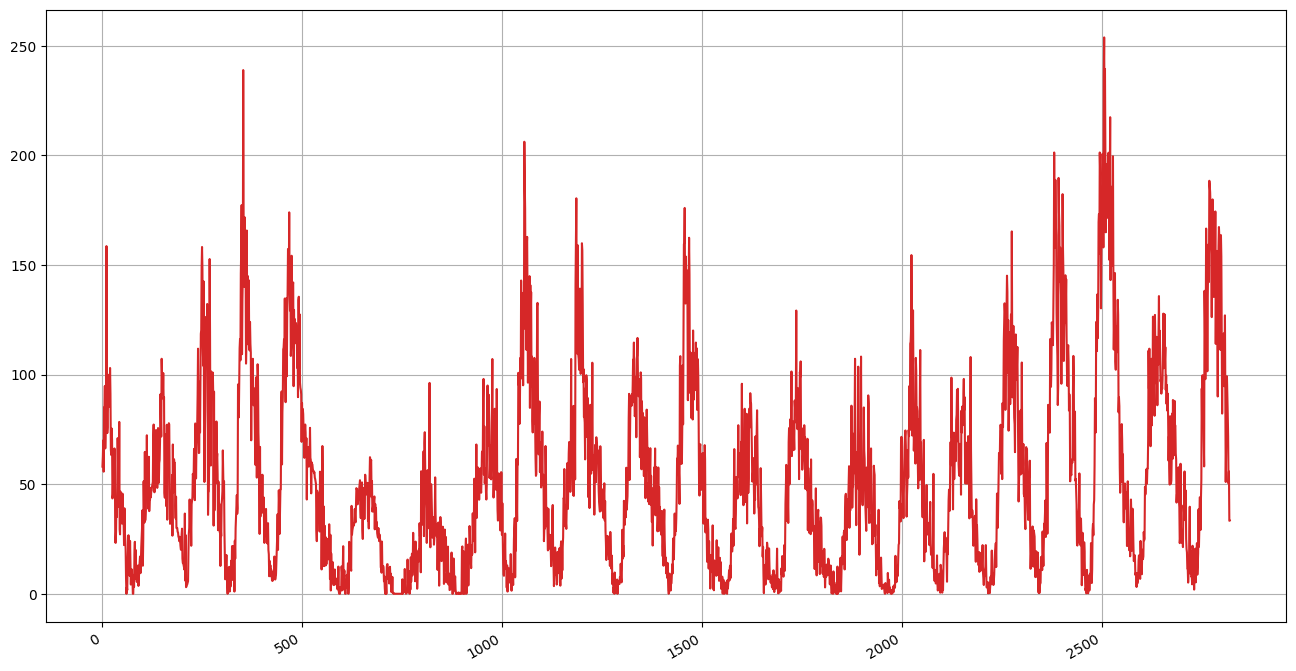

In [5]:
fig, ax = plt.subplots(figsize=(16, 9))
fig.autofmt_xdate()
ax.plot(data.sunspots, color='tab:red')
ax.grid()

In [6]:
data["prev"] = data["sunspots"].shift(1)
print(data)

             date  sunspots  prev
0     1749.000000      58.0   NaN
1     1749.083333      62.6  58.0
2     1749.166667      70.0  62.6
3     1749.250000      55.7  70.0
4     1749.333333      85.0  55.7
...           ...       ...   ...
2815  1983.583333      71.8  82.2
2816  1983.666667      50.3  71.8
2817  1983.750000      55.8  50.3
2818  1983.833333      33.3  55.8
2819  1983.916667      33.4  33.3

[2820 rows x 3 columns]


In [7]:
data = data.dropna()
print(data)

             date  sunspots  prev
1     1749.083333      62.6  58.0
2     1749.166667      70.0  62.6
3     1749.250000      55.7  70.0
4     1749.333333      85.0  55.7
5     1749.416667      83.5  85.0
...           ...       ...   ...
2815  1983.583333      71.8  82.2
2816  1983.666667      50.3  71.8
2817  1983.750000      55.8  50.3
2818  1983.833333      33.3  55.8
2819  1983.916667      33.4  33.3

[2819 rows x 3 columns]


In [8]:
train = data.iloc[:1000]
test  = data.iloc[1001:]
print(train)
print(test)
print(train.columns)

             date  sunspots  prev
1     1749.083333      62.6  58.0
2     1749.166667      70.0  62.6
3     1749.250000      55.7  70.0
4     1749.333333      85.0  55.7
5     1749.416667      83.5  85.0
...           ...       ...   ...
996   1832.000000      30.9  28.9
997   1832.083333      55.5  30.9
998   1832.166667      55.1  55.5
999   1832.250000      26.9  55.1
1000  1832.333333      41.3  26.9

[1000 rows x 3 columns]
             date  sunspots  prev
1002  1832.500000      13.9  26.7
1003  1832.583333       8.9  13.9
1004  1832.666667       8.2   8.9
1005  1832.750000      21.1   8.2
1006  1832.833333      14.3  21.1
...           ...       ...   ...
2815  1983.583333      71.8  82.2
2816  1983.666667      50.3  71.8
2817  1983.750000      55.8  50.3
2818  1983.833333      33.3  55.8
2819  1983.916667      33.4  33.3

[1818 rows x 3 columns]
Index(['date', 'sunspots', 'prev'], dtype='object')


In [9]:
x_train = train.loc[:,~train.columns.isin(["date","sunspots"])]
y_train = train["sunspots"]
print(x_train)
print(y_train)


      prev
1     58.0
2     62.6
3     70.0
4     55.7
5     85.0
...    ...
996   28.9
997   30.9
998   55.5
999   55.1
1000  26.9

[1000 rows x 1 columns]
1       62.6
2       70.0
3       55.7
4       85.0
5       83.5
        ... 
996     30.9
997     55.5
998     55.1
999     26.9
1000    41.3
Name: sunspots, Length: 1000, dtype: float64


In [15]:
from sklearn.ensemble import RandomForestRegressor

rf  = RandomForestRegressor(random_state=1)
fit = rf.fit(x_train, y_train)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Access the OOB Score
# oob_score = fit.oob_score_
# print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = fit.predict(x_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
rmse = rmse(y_train, predictions)
print(f'Mean Squared Error: {mse}')
print(f'RMSE: {rmse}')

r2 = r2_score(y_train, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 93.1629314562501
RMSE: 9.65209466676794
R-squared: 0.9346272055768903


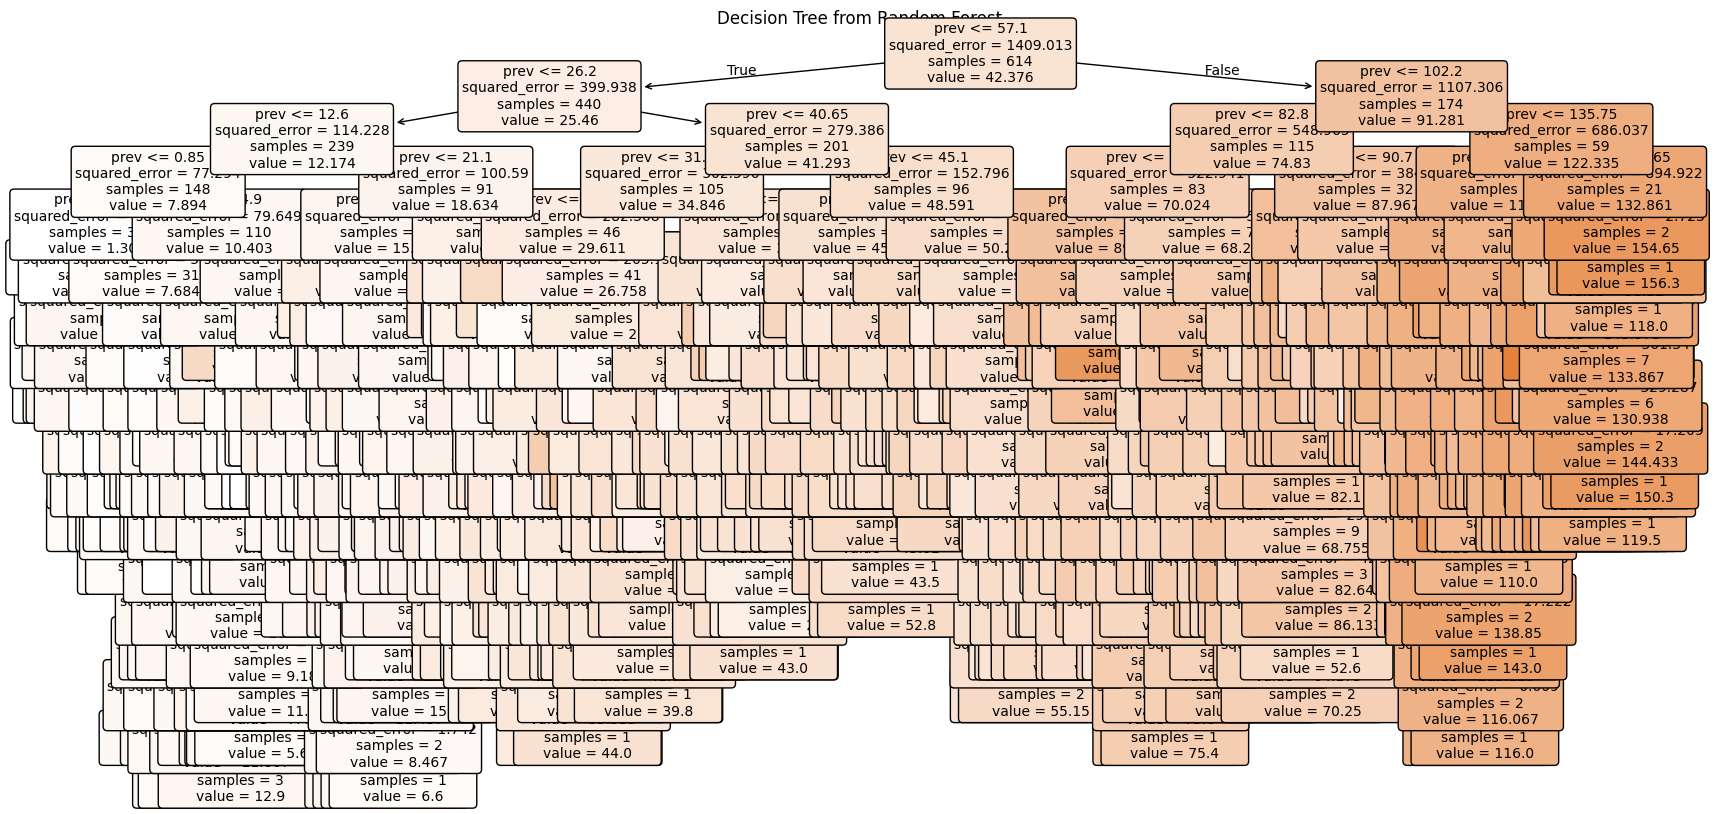

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = fit.estimators_[1]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=x_train.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

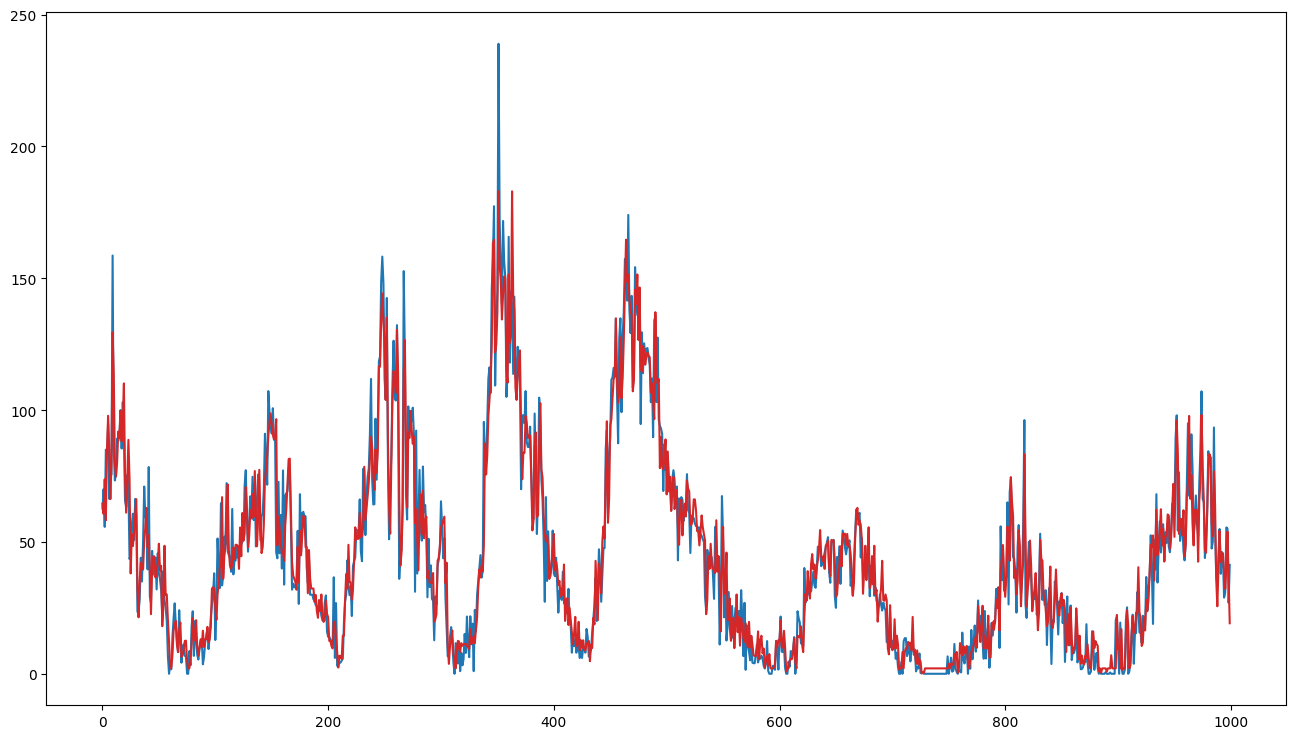

In [13]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(y_train.values, color='tab:blue')
ax.plot(predictions, color='tab:red')

[20.04        4.69654048  9.95541865 ... 64.96186081 57.28556548
 28.07093333]


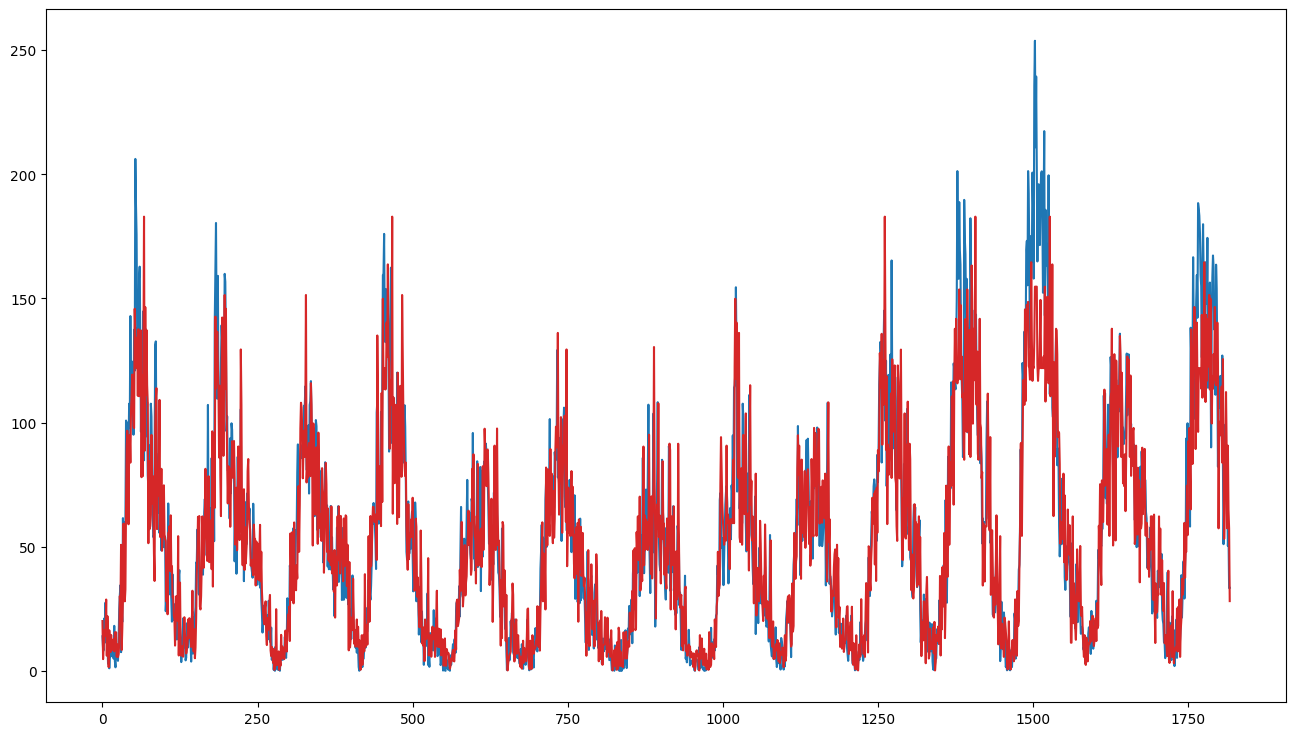

In [14]:
# représenter les prévisions sur le test, identifier et comprendre le problème
x_test = test.loc[:,~test.columns.isin(["date","sunspots"])]
y_test = test["sunspots"]
y_test_predict = fit.predict(x_test)
print(y_test_predict)

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(y_test.values, color='tab:blue')
ax.plot(y_test_predict, color='tab:red')